In [4]:
import sys                                                                                                                                                                             
import pandas as pd                                                                                                                                                                    
import matplotlib as mpl                                                                                                                                                               
import matplotlib.pyplot as plt                                                                                                                                                        
import os                                                                                                                                                                              
import numpy as np    

## mass points

In [5]:
massarr = np.array([120., 124., 124.5, 125., 125.5, 126., 130.]) 

## array of H xsec at 13TeV (from YR4: https://twiki.cern.ch/twiki/bin/view/LHCPhysics/CERNYellowReportPageAt13TeV ) 

In [11]:
xsec13_ggh = np.array([5.222e+01, 4.927e+01, 4.892e+01, 4.858e+01, 4.823e+01, 4.789e+01, 4.531e+01]) # [pb], N3LO                                                          
xsec13_vbfh = np.array([3.935e+00, 3.812e+00, 3.797e+00, 3.782e+00, 3.767e+00, 3.752e+00, 3.637e+00]) # [pb]                                                                
xsec13_wplush = np.array([9.558e-01, 8.611e-01, 8.500e-01, 8.400e-01, 8.291e-01, 8.184e-01, 7.414e-01]) # [pb]                                                                
xsec13_wminush = np.array([6.092e-01, 5.466e-01, 5.395e-01, 5.328e-01, 5.259e-01, 5.187e-01, 4.676e-01]) # [pb]                                                                
xsec13_zh_ppzh = np.array([9.939e-01, 9.051e-01, 8.943e-01, 8.839e-01, 8.744e-01, 8.649e-01, 7.899e-01]) # [pb] # ingredient for xsec ZH                                       
xsec13_zh_ggzh = np.array([1.299e-01, 1.242e-01, 1.235e-01, 1.227e-01, 1.221e-01, 1.218e-01, 1.164e-01]) # [pb] # ingredient for xsec ZH                                       
xsec13_tth = np.array([5.697e-01, 5.193e-01, 5.132e-01, 5.071e-01, 5.023e-01, 4.964e-01, 4.539e-01]) # [pb]  
xsec13_bbh = np.array([5.534e-01, 4.999e-01, 4.930e-01, 4.880e-01, 4.809e-01, 4.760e-01, 4.304e-01]) # [pb] 

#### xsec ZH: obtained as: xsec(pp->ZH) - xsec(gg->ZH)

In [12]:
xsec13_zh = xsec13_zh_ppzh - xsec13_zh_ggzh

In [13]:
xsec13_zh

array([0.864 , 0.7809, 0.7708, 0.7612, 0.7523, 0.7431, 0.6735])

#### scale factor for lumi

In [28]:
lumiScale = 13.6 / 13.

In [29]:
lumiScale

1.0461538461538462

### plot

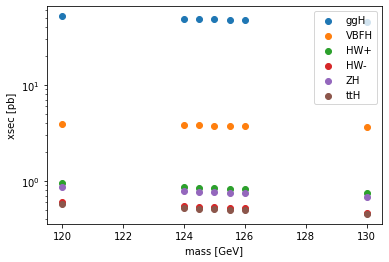

In [30]:
fig, ax = plt.subplots()
ax.scatter(massarr, xsec13_ggh, label='ggH')
ax.scatter(massarr, xsec13_vbfh, label='VBFH')
ax.scatter(massarr, xsec13_wplush, label='HW+')
ax.scatter(massarr, xsec13_wminush, label='HW-')
ax.scatter(massarr, xsec13_zh, label='ZH')
ax.scatter(massarr, xsec13_tth, label='ttH')
ax.legend()

ax.set_xlabel('mass [GeV]')
ax.set_ylabel('xsec [pb]')
ax.set_yscale('log')

## xsec scaled at 13.6 TeV

In [31]:
xsec13p6_ggh     = xsec13_ggh    *lumiScale
xsec13p6_vbfh    = xsec13_vbfh   *lumiScale
xsec13p6_wplush  = xsec13_wplush *lumiScale
xsec13p6_wminush = xsec13_wminush*lumiScale
xsec13p6_zh      = xsec13_zh     *lumiScale
xsec13p6_tth     = xsec13_tth    *lumiScale

In [32]:
xsec13p6_ggh

array([54.63015385, 51.544     , 51.17784615, 50.82215385, 50.456     ,
       50.10030769, 47.40123077])

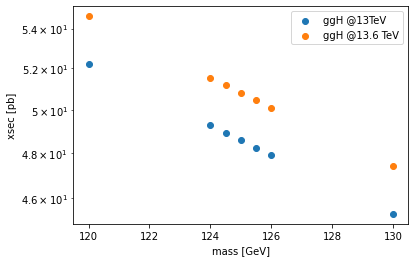

In [33]:
fig1, ax1 = plt.subplots()
ax1.scatter(massarr, xsec13_ggh, label='ggH @13TeV')
ax1.scatter(massarr, xsec13p6_ggh, label='ggH @13.6 TeV')

ax1.legend()

ax1.set_xlabel('mass [GeV]')
ax1.set_ylabel('xsec [pb]')
ax1.set_yscale('log')

#  RECOMMENDED scaling method [THE ONE TO BE USED!]

xsec_13p6 = xsec_13 * 0.4 + xsec_14 * 0.6

https://indico.cern.ch/event/1169286/contributions/5126668/attachments/2557560/4416316/HXSWG.pdf#page=5

### array of H xsec at 14 TeV 

from YR4: https://twiki.cern.ch/twiki/bin/view/LHCPhysics/CERNYellowReportPageAt14TeV

In [15]:
xsec14_ggh = np.array([5.871e+01, 5.545e+01, 5.506e+01, 5.467e+01, 5.429e+01, 5.392e+01, 5.105e+01]) # [pb] N3LO
xsec14_vbfh = np.array([4.448e+00, 4.311e+00, 4.295e+00, 4.278e+00, 4.262e+00, 4.245e+00, 4.117e+00]) # [pb]                                                                
xsec14_wplush = np.array([1.048e+00, 9.457e-01, 9.338e-01, 9.218e-01, 9.099e-01, 8.990e-01, 8.131e-01]) # [pb]                                                                
xsec14_wminush = np.array([6.761e-01, 6.077e-01, 5.997e-01, 5.912e-01, 5.841e-01, 5.770e-01, 5.199e-01]) # [pb]                                                                
xsec14_zh_ppzh = np.array([1.106e+00, 1.009e+00, 9.974e-01, 9.861e-01, 9.745e-01, 9.745e-01, 8.805e-01]) # [pb] # ingredient for xsec ZH                                       
xsec14_zh_ggzh = np.array([1.523e-01, 1.461e-01, 1.452e-01, 1.443e-01, 1.435e-01, 1.435e-01, 1.363e-01]) # [pb] # ingredient for xsec ZH                                       
xsec14_tth = np.array([6.888e-01, 6.279e-01, 6.217e-01, 6.137e-01, 6.075e-01, 6.009e-01, 5.486e-01]) # [pb] 
xsec14_bbh = np.array([6.288E-01, 5.672E-01, 5.596E-01, 5.529E-01, 5.453E-01, 5.384E-01, 4.878E-01]) # [pb]

#### xsec ZH: obtained as: xsec(pp->ZH) - xsec(gg->ZH)

In [16]:
xsec14_zh = xsec14_zh_ppzh - xsec14_zh_ggzh

In [17]:
xsec14_zh

array([0.9537, 0.8629, 0.8522, 0.8418, 0.831 , 0.831 , 0.7442])

### xsec scaled v2

In [19]:
xsec13p6_ggh_v2     = 0.4 * xsec13_ggh     + 0.6 * xsec14_ggh
xsec13p6_vbfh_v2    = 0.4 * xsec13_vbfh    + 0.6 * xsec14_vbfh
xsec13p6_wplush_v2  = 0.4 * xsec13_wplush  + 0.6 * xsec14_wplush
xsec13p6_wminush_v2 = 0.4 * xsec13_wminush + 0.6 * xsec14_wminush
xsec13p6_zh_v2      = 0.4 * xsec13_zh      + 0.6 * xsec14_zh
xsec13p6_tth_v2     = 0.4 * xsec13_tth     + 0.6 * xsec14_tth
xsec13p6_bbh_v2     = 0.4 * xsec13_bbh     + 0.6 * xsec14_bbh

In [20]:
xsec13p6_ggh_v2

array([56.114, 52.978, 52.604, 52.234, 51.866, 51.508, 48.754])

In [21]:
xsec13p6_vbfh_v2

array([4.2428, 4.1114, 4.0958, 4.0796, 4.064 , 4.0478, 3.925 ])

In [22]:
xsec13p6_wplush_v2

array([1.01112, 0.91186, 0.90028, 0.88908, 0.87758, 0.86676, 0.78442])

In [23]:
xsec13p6_wminush_v2

array([0.64934, 0.58326, 0.57562, 0.56784, 0.56082, 0.55368, 0.49898])

In [24]:
xsec13p6_zh_v2

array([0.91782, 0.8301 , 0.81964, 0.80956, 0.79952, 0.79584, 0.71592])

In [25]:
xsec13p6_tth_v2

array([0.64116, 0.58446, 0.5783 , 0.57106, 0.56542, 0.5591 , 0.51072])

In [26]:
xsec13p6_bbh_v2

array([0.59864, 0.54028, 0.53296, 0.52694, 0.51954, 0.51344, 0.46484])

Text(0, 0.5, 'xsec [pb]')

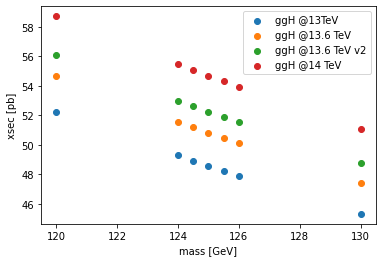

In [34]:
fig2, ax2 = plt.subplots()
ax2.scatter(massarr, xsec13_ggh, label='ggH @13TeV')
ax2.scatter(massarr, xsec13p6_ggh, label='ggH @13.6 TeV')
ax2.scatter(massarr, xsec13p6_ggh_v2, label='ggH @13.6 TeV v2')
ax2.scatter(massarr, xsec14_ggh, label='ggH @14 TeV')

ax2.legend()

ax2.set_xlabel('mass [GeV]')
ax2.set_ylabel('xsec [pb]')